# 🌱 Deteksi Penyakit Tanaman - Complete Pipeline

Notebook lengkap untuk:
1. Setup & Load Data
2. Build & Train Model
3. Evaluate Model
4. Predict Gambar Baru

---

## 📦 PART 1: SETUP & INSTALLATION

In [1]:
# Install dependencies (uncomment jika belum install)
# !pip install tensorflow numpy matplotlib scikit-learn seaborn opencv-python pillow

In [2]:
# Import libraries
import os
import json
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

# Import modul utils (pastikan file plant_disease_utils.py ada di folder yang sama)
from habibi import (
    PlantDiseaseDataLoader,
    PlantDiseaseModel,
    Visualizer,
    ModelEvaluator,
    PlantDiseasePredictor,
    save_class_names,
    load_class_names,
    print_model_info
)

# Set random seed
np.random.seed(42)
tf.random.set_seed(42)

print("="*60)
print("🌱 PLANT DISEASE DETECTION SYSTEM")
print("="*60)
print(f"✅ TensorFlow version: {tf.__version__}")
print(f"✅ GPU Available: {len(tf.config.list_physical_devices('GPU')) > 0}")
print("="*60)

🌱 PLANT DISEASE DETECTION SYSTEM
✅ TensorFlow version: 2.20.0
✅ GPU Available: False


## 📁 PART 2: DATASET SETUP & LOADING

In [3]:
# Konfigurasi path dataset
DATASET_PATH = "plantvillage_dataset"  # ⚠️ SESUAIKAN dengan lokasi dataset Anda
TRAIN_PATH = os.path.join('Plant-disease/Dataset/', "train")
VAL_PATH = os.path.join('Plant-disease/Dataset/', "validation")
TEST_PATH = os.path.join('Plant-disease/Dataset/', "test")

# Verifikasi path
print("📁 Checking dataset paths...")
for path_name, path in [("Train", TRAIN_PATH), ("Validation", VAL_PATH), ("Test", TEST_PATH)]:
    if os.path.exists(path):
        num_classes = len(os.listdir(path))
        print(f"✅ {path_name}: {path} ({num_classes} classes)")
    else:
        print(f"❌ {path_name}: {path} NOT FOUND!")

📁 Checking dataset paths...
✅ Train: Plant-disease/Dataset/train (15 classes)
✅ Validation: Plant-disease/Dataset/validation (15 classes)
✅ Test: Plant-disease/Dataset/test (10 classes)


In [4]:
# Konfigurasi training
IMG_SIZE = 224
BATCH_SIZE = 32
EPOCHS = 20  # ⚠️ Sesuaikan dengan kebutuhan (lebih banyak = lebih lama tapi lebih akurat)
LEARNING_RATE = 0.001

print("\n⚙️ Training Configuration:")
print(f"   Image Size: {IMG_SIZE}x{IMG_SIZE}")
print(f"   Batch Size: {BATCH_SIZE}")
print(f"   Epochs: {EPOCHS}")
print(f"   Learning Rate: {LEARNING_RATE}")


⚙️ Training Configuration:
   Image Size: 224x224
   Batch Size: 32
   Epochs: 20
   Learning Rate: 0.001


In [5]:
# Load dataset dengan augmentasi
print("\n🔄 Loading dataset...")
data_loader = PlantDiseaseDataLoader(img_size=IMG_SIZE, batch_size=BATCH_SIZE)

train_gen, val_gen, test_gen = data_loader.create_data_generators(
    TRAIN_PATH, VAL_PATH, TEST_PATH
)

# Get class names
class_names = data_loader.get_class_names(train_gen)
num_classes = len(class_names)

print(f"\n✅ Dataset loaded successfully!")
print(f"📊 Number of classes: {num_classes}")
print(f"📊 Training samples: {train_gen.samples}")
print(f"📊 Validation samples: {val_gen.samples}")
print(f"📊 Test samples: {test_gen.samples}")


🔄 Loading dataset...
Found 19244 images belonging to 15 classes.
Found 19244 images belonging to 15 classes.
Found 4574 images belonging to 10 classes.

✅ Dataset loaded successfully!
📊 Number of classes: 15
📊 Training samples: 19244
📊 Validation samples: 19244
📊 Test samples: 4574


In [6]:
# Lihat nama kelas
print("\n📋 CLASS NAMES:")
print("="*60)
for i, class_name in enumerate(class_names, 1):
    print(f"{i:2d}. {class_name}")
print("="*60)


📋 CLASS NAMES:
 1. Tomato___Bacterial_spot
 2. Tomato___Early_blight
 3. Tomato___Late_blight
 4. Tomato___Leaf_Mold
 5. Tomato___Septoria_leaf_spot
 6. Tomato___Spider_mites Two-spotted_spider_mite
 7. Tomato___Target_Spot
 8. Tomato___Tomato_Yellow_Leaf_Curl_Virus
 9. Tomato___Tomato_mosaic_virus
10. Tomato___healthy
11. cbb
12. cbsd
13. cgm
14. cmd
15. healthy


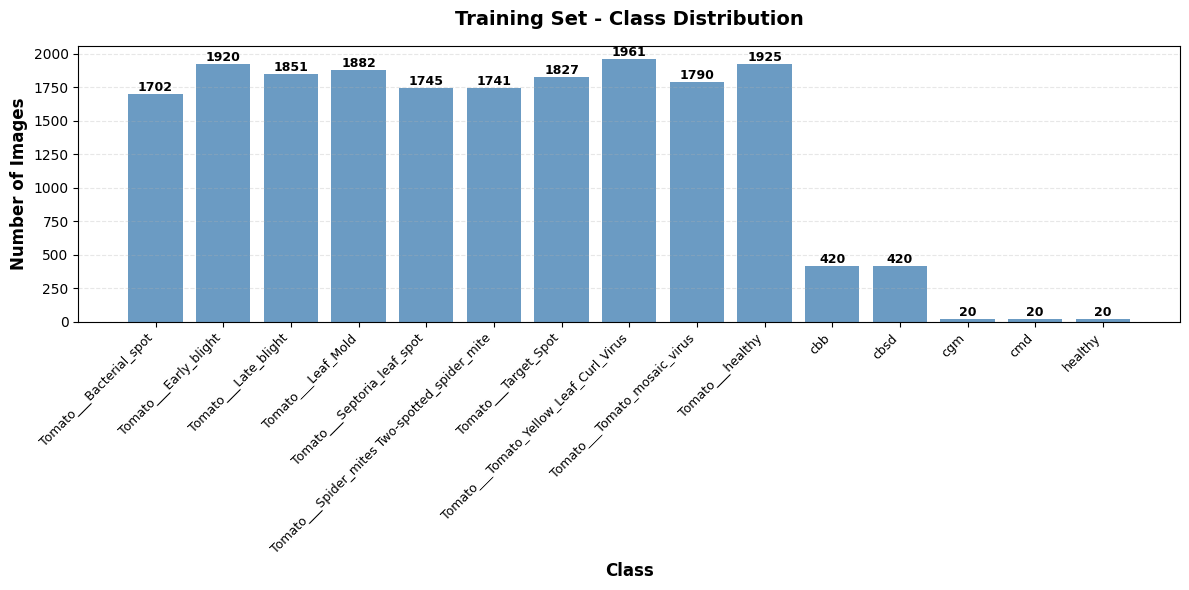


📊 CLASS DISTRIBUTION STATISTICS
Total Images: 19244
Number of Classes: 15
Average per Class: 1282.9
Min: 20 | Max: 1961


In [7]:
# Visualisasi distribusi kelas
visualizer = Visualizer()
visualizer.plot_class_distribution(train_gen, title='Training Set - Class Distribution')


📷 Sample images from training set:


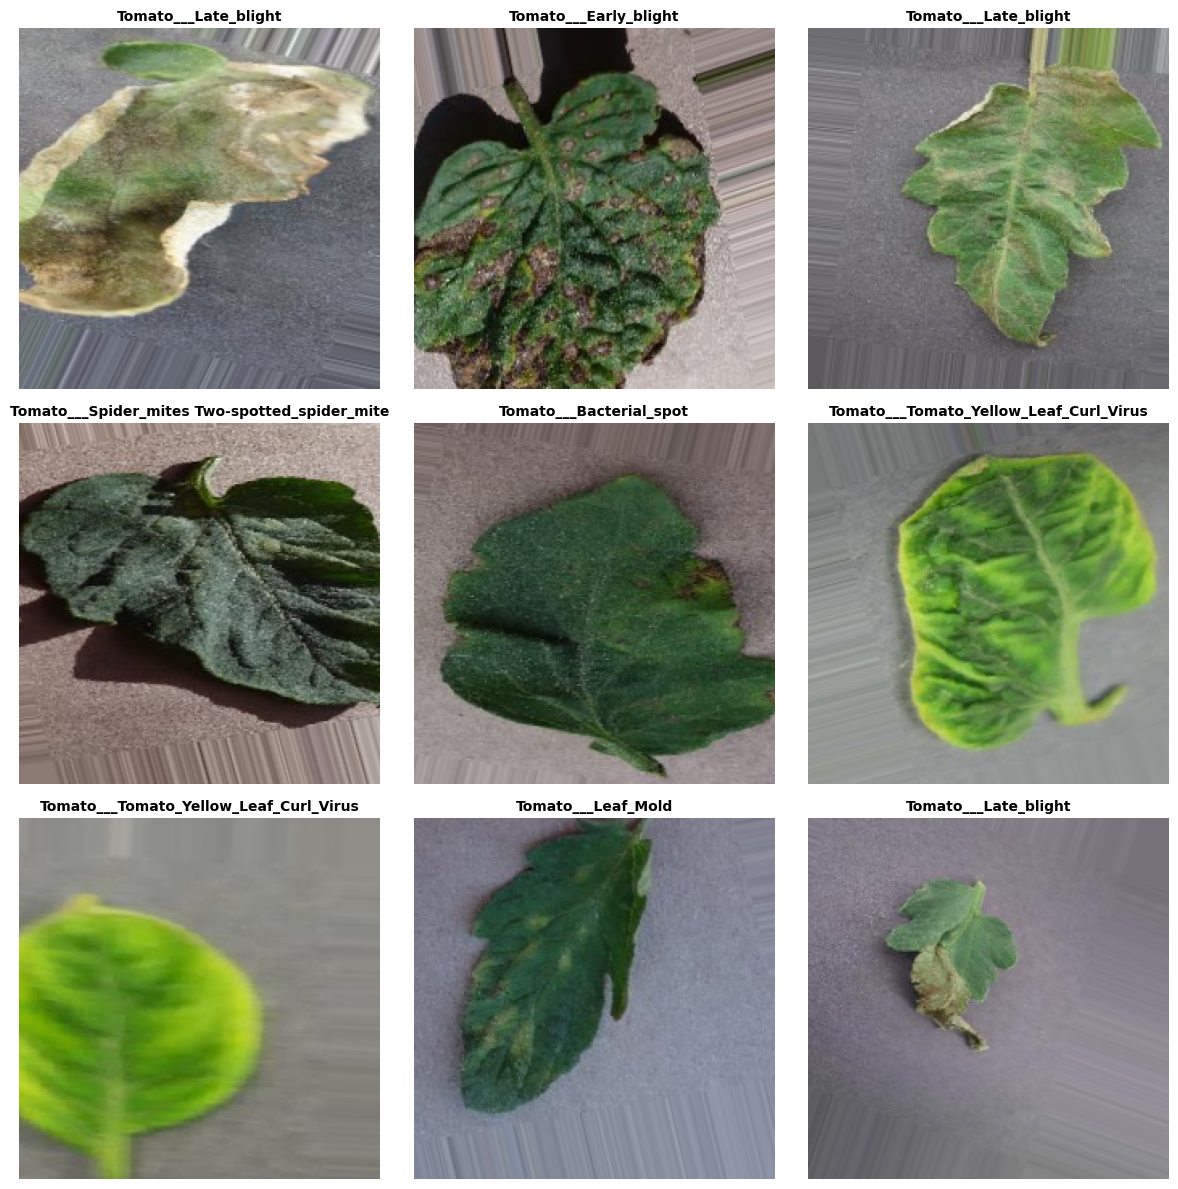

In [8]:
# Tampilkan sample gambar
print("\n📷 Sample images from training set:")
data_loader.show_sample_images(train_gen, num_samples=9)

In [9]:
# Simpan class names dan config
save_class_names(class_names, 'class_names.txt')

config = {
    'num_classes': num_classes,
    'img_size': IMG_SIZE,
    'batch_size': BATCH_SIZE,
    'epochs': EPOCHS,
    'learning_rate': LEARNING_RATE,
    'train_samples': train_gen.samples,
    'val_samples': val_gen.samples,
    'test_samples': test_gen.samples
}

with open('config.json', 'w') as f:
    json.dump(config, f, indent=4)
    
print("\n✅ Configuration saved!")

✅ Class names saved to class_names.txt

✅ Configuration saved!


## 🧠 PART 3: BUILD MODEL

In [10]:
# Inisialisasi model builder
disease_model = PlantDiseaseModel(num_classes=num_classes, img_size=IMG_SIZE)

# ⚠️ PILIH SALAH SATU ARSITEKTUR (uncomment yang mau dipakai):

# Option A: Transfer Learning dengan MobileNetV2 (RECOMMENDED - Lebih Akurat)
model = disease_model.build_transfer_learning_model()
MODEL_NAME = "transfer_learning_model"

# Option B: CNN dari Scratch (Lebih Ringan)
# model = disease_model.build_cnn_model()
# MODEL_NAME = "cnn_scratch_model"

print(f"\n✅ Model architecture: {MODEL_NAME}")


✅ Model architecture: transfer_learning_model


In [11]:
# Lihat arsitektur model
print_model_info(model)


📋 MODEL INFORMATION


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224            │ (None, 7, 7, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       327,936 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 15)             │         1,935 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,621,775 (10.00 MB)

 Trainable params: 363,279 (1.39 MB)

 Non-trainable params: 2,258,496 (8.62 MB)


📊 PARAMETER SUMMARY
Total Parameters: 2,621,775
Trainable Parameters: 363,279
Non-trainable Parameters: 2,258,496



In [12]:
# Compile model
disease_model.compile_model(learning_rate=LEARNING_RATE)

print("\n✅ Model compiled successfully!")
print(f"   Optimizer: Adam (lr={LEARNING_RATE})")
print(f"   Loss: Categorical Crossentropy")
print(f"   Metrics: Accuracy, Top-3 Accuracy")


✅ Model compiled successfully!
   Optimizer: Adam (lr=0.001)
   Loss: Categorical Crossentropy
   Metrics: Accuracy, Top-3 Accuracy


## 🚀 PART 4: TRAINING MODEL

⚠️ **PERHATIAN**: Proses training akan memakan waktu!

Estimasi waktu:
- **Dengan GPU**: 5-15 menit per epoch
- **Tanpa GPU**: 30-60 menit per epoch

Training akan otomatis:
- Menyimpan model terbaik
- Early stopping jika tidak ada peningkatan
- Mengurangi learning rate secara otomatis

In [ ]:
# Set model save path
MODEL_SAVE_PATH = f"best_{MODEL_NAME}.h5"

print("="*60)
print(f"🚀 Starting training for {EPOCHS} epochs...")
print(f"💾 Model will be saved to: {MODEL_SAVE_PATH}")
print("="*60)
print("\n⏳ Training in progress... Please wait...\n")

# Train model
history = disease_model.train(
    train_gen,
    val_gen,
    epochs=EPOCHS,
    model_save_path=MODEL_SAVE_PATH
)

print("\n" + "="*60)
print("✅ TRAINING COMPLETED!")
print("="*60)

🚀 Starting training for 20 epochs...
💾 Model will be saved to: best_transfer_learning_model.h5

⏳ Training in progress... Please wait...

Epoch 1/20
602/602 ━━━━━━━━━━━━━━━━━━━━ 0s 636ms/step - accuracy: 0.8695 - loss: 0.3646 - top_3_accuracy: 0.9870  
Epoch 1: val_accuracy improved from None to 0.90485, saving model to best_transfer_learning_model.h5


602/602 ━━━━━━━━━━━━━━━━━━━━ 636s 1s/step - accuracy: 0.8703 - loss: 0.3691 - top_3_accuracy: 0.9858 - val_accuracy: 0.9049 - val_loss: 0.2600 - val_top_3_accuracy: 0.9924 - learning_rate: 2.5000e-04
Epoch 2/20
602/602 ━━━━━━━━━━━━━━━━━━━━ 0s 584ms/step - accuracy: 0.8676 - loss: 0.3765 - top_3_accuracy: 0.9844  
Epoch 2: val_accuracy improved from 0.90485 to 0.91166, saving model to best_transfer_learning_model.h5


602/602 ━━━━━━━━━━━━━━━━━━━━ 656s 1s/step - accuracy: 0.8722 - loss: 0.3699 - top_3_accuracy: 0.9851 - val_accuracy: 0.9117 - val_loss: 0.2434 - val_top_3_accuracy: 0.9935 - learning_rate: 2.5000e-04
Epoch 3/20
602/602 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8760 - loss: 0.3636 - top_3_accuracy: 0.9857   
Epoch 3: val_accuracy did not improve from 0.91166
602/602 ━━━━━━━━━━━━━━━━━━━━ 1111s 2s/step - accuracy: 0.8747 - loss: 0.3588 - top_3_accuracy: 0.9860 - val_accuracy: 0.9066 - val_loss: 0.2545 - val_top_3_accuracy: 0.9939 - learning_rate: 2.5000e-04
Epoch 4/20
602/602 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8726 - loss: 0.3739 - top_3_accuracy: 0.9865   
Epoch 4: val_accuracy did not improve from 0.91166
602/602 ━━━━━━━━━━━━━━━━━━━━ 1135s 2s/step - accuracy: 0.8735 - loss: 0.3645 - top_3_accuracy: 0.9861 - val_accuracy: 0.9071 - val_loss: 0.2569 - val_top_3_accuracy: 0.9930 - learning_rate: 2.5000e-04
Epoch 5/20
602/602 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8748 

602/602 ━━━━━━━━━━━━━━━━━━━━ 650s 1s/step - accuracy: 0.8795 - loss: 0.3451 - top_3_accuracy: 0.9874 - val_accuracy: 0.9123 - val_loss: 0.2398 - val_top_3_accuracy: 0.9941 - learning_rate: 1.2500e-04
Epoch 8/20
602/602 ━━━━━━━━━━━━━━━━━━━━ 0s 639ms/step - accuracy: 0.8768 - loss: 0.3501 - top_3_accuracy: 0.9875  
Epoch 8: val_accuracy improved from 0.91234 to 0.91260, saving model to best_transfer_learning_model.h5


602/602 ━━━━━━━━━━━━━━━━━━━━ 644s 1s/step - accuracy: 0.8807 - loss: 0.3404 - top_3_accuracy: 0.9876 - val_accuracy: 0.9126 - val_loss: 0.2389 - val_top_3_accuracy: 0.9938 - learning_rate: 1.2500e-04
Epoch 9/20
602/602 ━━━━━━━━━━━━━━━━━━━━ 0s 628ms/step - accuracy: 0.8747 - loss: 0.3532 - top_3_accuracy: 0.9865  
Epoch 9: val_accuracy did not improve from 0.91260
602/602 ━━━━━━━━━━━━━━━━━━━━ 628s 1s/step - accuracy: 0.8765 - loss: 0.3470 - top_3_accuracy: 0.9869 - val_accuracy: 0.9079 - val_loss: 0.2501 - val_top_3_accuracy: 0.9931 - learning_rate: 1.2500e-04
Epoch 10/20
602/602 ━━━━━━━━━━━━━━━━━━━━ 0s 581ms/step - accuracy: 0.8813 - loss: 0.3376 - top_3_accuracy: 0.9884  
Epoch 10: val_accuracy improved from 0.91260 to 0.91410, saving model to best_transfer_learning_model.h5


602/602 ━━━━━━━━━━━━━━━━━━━━ 603s 1s/step - accuracy: 0.8818 - loss: 0.3342 - top_3_accuracy: 0.9882 - val_accuracy: 0.9141 - val_loss: 0.2367 - val_top_3_accuracy: 0.9941 - learning_rate: 1.2500e-04
Epoch 11/20
 59/602 ━━━━━━━━━━━━━━━━━━━━ 5:15 581ms/step - accuracy: 0.8720 - loss: 0.3600 - top_3_accuracy: 0.9840

## 📊 PART 5: VISUALISASI HASIL TRAINING

In [ ]:
# Plot training history (accuracy & loss)
visualizer.plot_training_history(history, save_path='training_history.png')

## 🎯 PART 6: EVALUASI MODEL

In [ ]:
# Load best model untuk evaluasi
best_model = keras.models.load_model(MODEL_SAVE_PATH)
print(f"✅ Loaded best model from: {MODEL_SAVE_PATH}")

In [ ]:
# Evaluasi model pada test set
evaluator = ModelEvaluator()
y_true, y_pred_classes, test_acc = evaluator.evaluate_model(
    best_model, test_gen, class_names
)

In [ ]:
# Plot confusion matrix
visualizer.plot_confusion_matrix(y_true, y_pred_classes, class_names, 
                                 save_path='confusion_matrix.png')

In [ ]:
# Plot sample predictions
visualizer.plot_sample_predictions(best_model, test_gen, class_names, 
                                   num_samples=9, save_path='sample_predictions.png')

## 🔮 PART 7: PREDIKSI GAMBAR BARU

Gunakan model untuk memprediksi gambar tanaman baru!

In [ ]:
# Inisialisasi predictor
predictor = PlantDiseasePredictor(
    model_path=MODEL_SAVE_PATH,
    class_names=class_names,
    img_size=IMG_SIZE
)

In [ ]:
# Prediksi SINGLE IMAGE
# ⚠️ Ganti path dengan gambar yang ingin diprediksi
test_image_path = "Plant-disease/Dataset/train/Tomato__healthy/0a205a11-1e64-49f7-93c2-ad59312b4f83___RS_HL 0334_flipTB.JPG"

# Prediksi dan visualisasi
results = predictor.predict_and_visualize(test_image_path, 
                                         save_path='prediction_result.png')

In [ ]:
# Prediksi MULTIPLE IMAGES (Batch)
# ⚠️ Tambahkan list gambar yang ingin diprediksi
test_images = [
    "Plant-disease/Dataset/train/Tomato__healthy/0a205a11-1e64-49f7-93c2-ad59312b4f83___RS_HL 0334_flipTB.JPG",
    "Plant-disease/Dataset/train/Tomato__healthy/0a205a11-1e64-49f7-93c2-ad59312b4f83___RS_HL 0334_flipTB.JPG",
    "Plant-disease/Dataset/train/Tomato__healthy/0a205a11-1e64-49f7-93c2-ad59312b4f83___RS_HL 0334_flipTB.JPG"
]

# Prediksi batch
batch_results = predictor.predict_batch(test_images, visualize=True)

In [ ]:
# Lihat hasil prediksi batch dalam format tabel
import pandas as pd

# Convert ke DataFrame untuk tampilan yang lebih rapi
results_data = []
for result in batch_results:
    img_name = os.path.basename(result['image'])
    top_pred = result['predictions'][0]
    results_data.append({
        'Image': img_name,
        'Predicted Class': top_pred['class'],
        'Confidence (%)': f"{top_pred['confidence']:.2f}"
    })

df_results = pd.DataFrame(results_data)
print("\n📊 BATCH PREDICTION RESULTS:")
print("="*60)
print(df_results.to_string(index=False))
print("="*60)

## 💾 PART 8: SIMPAN HASIL & MODEL

In [ ]:
# Ringkasan file yang tersimpan
saved_files = [
    MODEL_SAVE_PATH,
    'class_names.txt',
    'config.json',
    'training_history.png',
    'confusion_matrix.png',
    'sample_predictions.png'
]

print("\n💾 SAVED FILES:")
print("="*60)
for i, file in enumerate(saved_files, 1):
    if os.path.exists(file):
        size = os.path.getsize(file) / (1024*1024)  # Convert to MB
        print(f"{i}. ✅ {file} ({size:.2f} MB)")
    else:
        print(f"{i}. ❌ {file} (Not found)")
print("="*60)

## 📝 SUMMARY & KESIMPULAN

### Hasil Training:
- ✅ Model berhasil dilatih
- ✅ Model terbaik tersimpan
- ✅ Visualisasi training history dibuat
- ✅ Confusion matrix dibuat
- ✅ Model siap untuk prediksi

### Cara Menggunakan Model:

#### 1. **Untuk Prediksi di Notebook Ini:**
```python
predictor = PlantDiseasePredictor(
    model_path='best_model.h5',
    class_names=class_names
)
results = predictor.predict_and_visualize('path/to/image.jpg')
```

#### 2. **Untuk Prediksi di Script Python Lain:**
```python
from plant_disease_utils import PlantDiseasePredictor, load_class_names

class_names = load_class_names('class_names.txt')
predictor = PlantDiseasePredictor('best_model.h5', class_names)
results = predictor.predict('image.jpg')
```

### File Penting:
- `best_model.h5` - Model terlatih (file paling penting!)
- `class_names.txt` - Daftar nama kelas
- `config.json` - Konfigurasi training
- `plant_disease_utils.py` - Modul utilitas

### Tips:
1. Jangan hapus file `class_names.txt` - diperlukan untuk prediksi
2. Gunakan GPU untuk training lebih cepat
3. Tambah epoch untuk akurasi lebih tinggi
4. Gunakan Transfer Learning untuk hasil terbaik
5. Dataset minimal 100 gambar per kelas untuk hasil optimal

---
**🎉 Selamat! Model deteksi penyakit tanaman Anda siap digunakan!**